<a href="https://colab.research.google.com/github/Annrosejojue/ai-chatbot-performance-intelligence/blob/main/AI_Chatbot_Performance_Intelligence_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas numpy seaborn matplotlib plotly

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


# Upload file manually in Colab
from google.colab import files
uploaded = files.upload()

# Assuming file name is BI_Chatbot_Interactions.csv
df = pd.read_csv(list(uploaded.keys())[0])

print("Dataset Loaded Successfully!")
df.head()


Saving BI_Chatbot_Interactions.csv to BI_Chatbot_Interactions.csv
Dataset Loaded Successfully!


,interaction_id,timestamp,department,user_role,user_query,query_category,metrics_requested,analysis_type,bot_response_confidence,response_time_ms,user_feedback_rating,estimated_business_impact
0,INT-100000,2025-08-12 08:29:31.851880,HR,Intern,Forecast next quarter revenue,Revenue,Revenue,Descriptive,0.73,2381,4.0,High
1,INT-100001,2025-10-08 15:20:31.851905,Operations,Analyst,Forecast next quarter revenue,Marketing,Profit Margin,Descriptive,0.89,635,2.0,Low
2,INT-100002,2025-09-21 01:42:31.851909,Finance,Manager,What is customer churn rate?,Marketing,Conversion Rate,Predictive,0.84,557,5.0,NaN
3,INT-100003,2025-09-07 01:43:31.851912,Operations,Analyst,Compare sales performance by region,Marketing,Conversion Rate,Trend Analysis,0.76,2499,4.0,NaN
4,INT-100004,2025-09-17 20:17:31.851914,Operations,Executive,Which campaign had highest ROI?,Marketing,Conversion Rate,Predictive,0.98,334,2.0,High


In [2]:
# Shape of dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Column names
df.columns


Rows: 3200
Columns: 12


Index(['interaction_id', 'timestamp', 'department', 'user_role', 'user_query',
       'query_category', 'metrics_requested', 'analysis_type',
       'bot_response_confidence', 'response_time_ms', 'user_feedback_rating',
       'estimated_business_impact'],
      dtype='object')

In [3]:
# Missing values
df.isna().sum()

# Data types
df.dtypes


,0
interaction_id,object
timestamp,object
department,object
user_role,object
user_query,object
query_category,object
metrics_requested,object
analysis_type,object
bot_response_confidence,float64
response_time_ms,int64


In [4]:
def convert_timestamp(x):
    try:
        minutes, seconds = x.split(":")
        return int(minutes) * 60 + float(seconds)
    except:
        return np.nan

df['timestamp_seconds'] = df['timestamp'].apply(convert_timestamp)



In [5]:
df['estimated_business_impact'] = df['estimated_business_impact'].replace("nan", np.nan)


/tmp/ipython-input-3552335150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', palette='viridis')


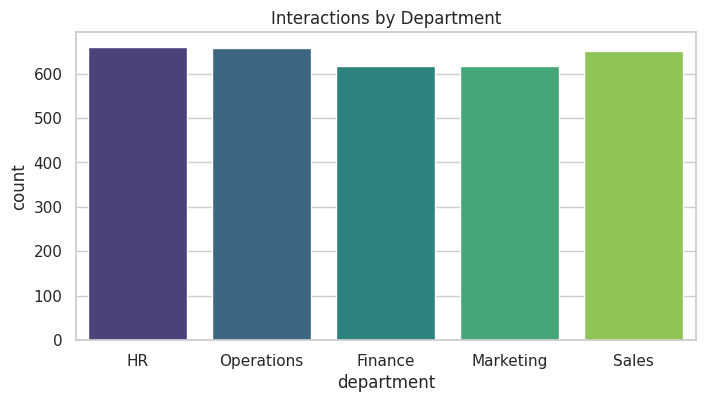

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='department', palette='viridis')
plt.title("Interactions by Department")
plt.show()


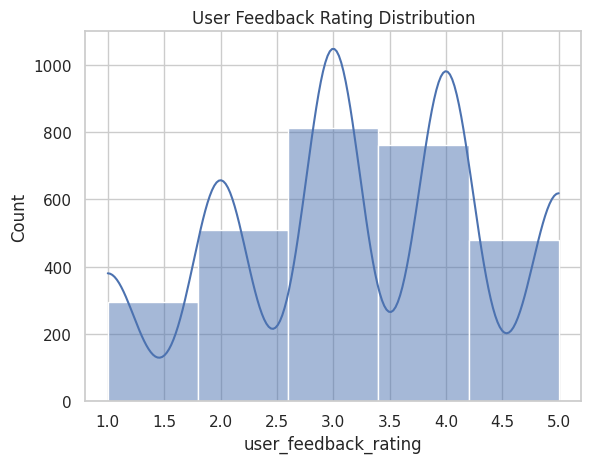

In [7]:
sns.histplot(df['user_feedback_rating'], bins=5, kde=True)
plt.title("User Feedback Rating Distribution")
plt.show()



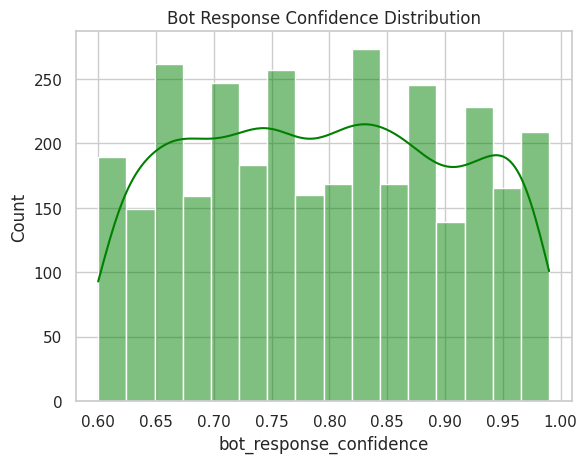

In [8]:
sns.histplot(df['bot_response_confidence'], kde=True, color='green')
plt.title("Bot Response Confidence Distribution")
plt.show()


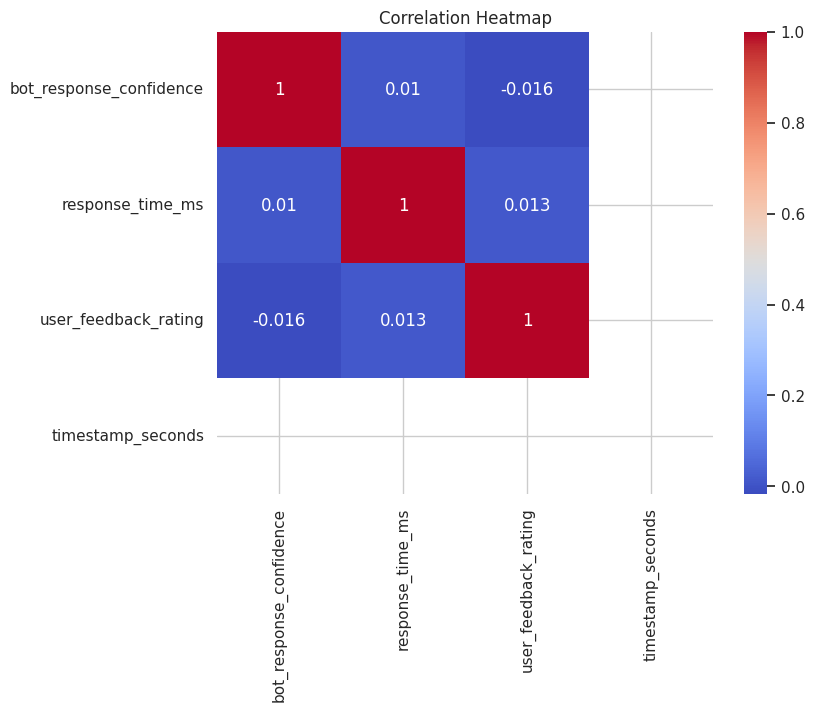

In [9]:
numeric_df = df[['bot_response_confidence',
                 'response_time_ms',
                 'user_feedback_rating',
                 'timestamp_seconds']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df.to_csv("cleaned_chatbot_data.csv", index=False)
print("Cleaned dataset saved for Day 2!")


Cleaned dataset saved for Day 2!


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


df = pd.read_csv("cleaned_chatbot_data.csv")
print("Dataset Loaded for Day 2!")
df.head()


Dataset Loaded for Day 2!


,interaction_id,timestamp,department,user_role,user_query,query_category,metrics_requested,analysis_type,bot_response_confidence,response_time_ms,user_feedback_rating,estimated_business_impact,timestamp_seconds
0,INT-100000,2025-08-12 08:29:31.851880,HR,Intern,Forecast next quarter revenue,Revenue,Revenue,Descriptive,0.73,2381,4.0,High,NaN
1,INT-100001,2025-10-08 15:20:31.851905,Operations,Analyst,Forecast next quarter revenue,Marketing,Profit Margin,Descriptive,0.89,635,2.0,Low,NaN
2,INT-100002,2025-09-21 01:42:31.851909,Finance,Manager,What is customer churn rate?,Marketing,Conversion Rate,Predictive,0.84,557,5.0,NaN,NaN
3,INT-100003,2025-09-07 01:43:31.851912,Operations,Analyst,Compare sales performance by region,Marketing,Conversion Rate,Trend Analysis,0.76,2499,4.0,NaN,NaN
4,INT-100004,2025-09-17 20:17:31.851914,Operations,Executive,Which campaign had highest ROI?,Marketing,Conversion Rate,Predictive,0.98,334,2.0,High,NaN


In [26]:
df['response_time_sec'] = df['response_time_ms'] / 1000


In [13]:
# Lower response time = higher score
df['efficiency_score'] = 1 / (1 + df['response_time_sec'])


In [14]:
df['confidence_norm'] = df['bot_response_confidence'] / df['bot_response_confidence'].max()


In [15]:
df['feedback_norm'] = df['user_feedback_rating'] / df['user_feedback_rating'].max()


In [16]:
impact_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

df['impact_score'] = df['estimated_business_impact'].map(impact_map)


In [17]:
df['performance_score'] = (
    0.4 * df['confidence_norm'] +
    0.3 * df['feedback_norm'] +
    0.2 * df['efficiency_score'] +
    0.1 * (df['impact_score'] / 3)
)


In [18]:
dept_perf = df.groupby('department')['performance_score'].mean().sort_values(ascending=False)
dept_perf


,performance_score
department,
HR,0.677549
Marketing,0.672370
Operations,0.670417
Sales,0.667964
Finance,0.662474


/tmp/ipython-input-2452631955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_perf.index, y=dept_perf.values, palette="viridis")


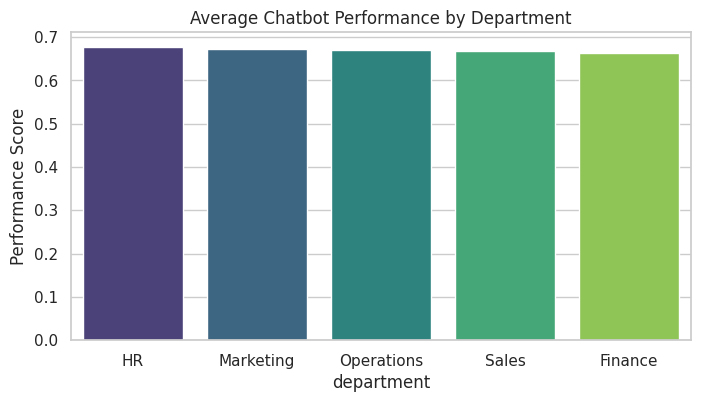

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x=dept_perf.index, y=dept_perf.values, palette="viridis")
plt.title("Average Chatbot Performance by Department")
plt.ylabel("Performance Score")
plt.show()


In [20]:
role_feedback = df.groupby('user_role')['user_feedback_rating'].mean().sort_values(ascending=False)
role_feedback


,user_feedback_rating
user_role,
Executive,3.282337
Intern,3.204110
Manager,3.194915
Analyst,3.187500


In [21]:
cat_perf = df.groupby('query_category')['performance_score'].mean().sort_values(ascending=False)
cat_perf


,performance_score
query_category,
Marketing,0.675168
Finance,0.670607
Revenue,0.669321
Sales,0.668290
Customer,0.668126


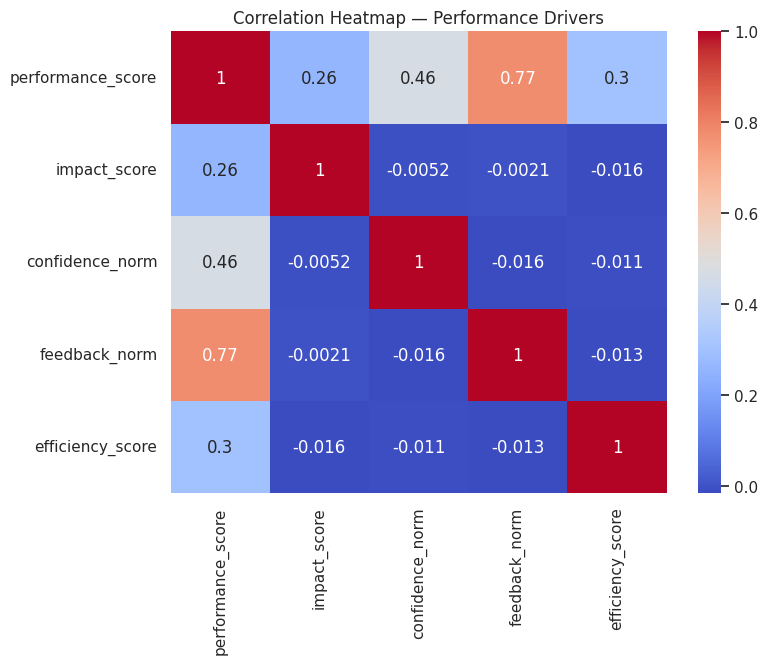

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['performance_score','impact_score','confidence_norm','feedback_norm','efficiency_score']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap — Performance Drivers")
plt.show()


Dataset Loaded for Day 3!
Rows after removing missing feedback: 2861
Model Performance:
MAE: 0.0
RMSE: 0.0
R² Score: 1.0


/tmp/ipython-input-1737448422.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='importance', y='feature', palette='viridis')


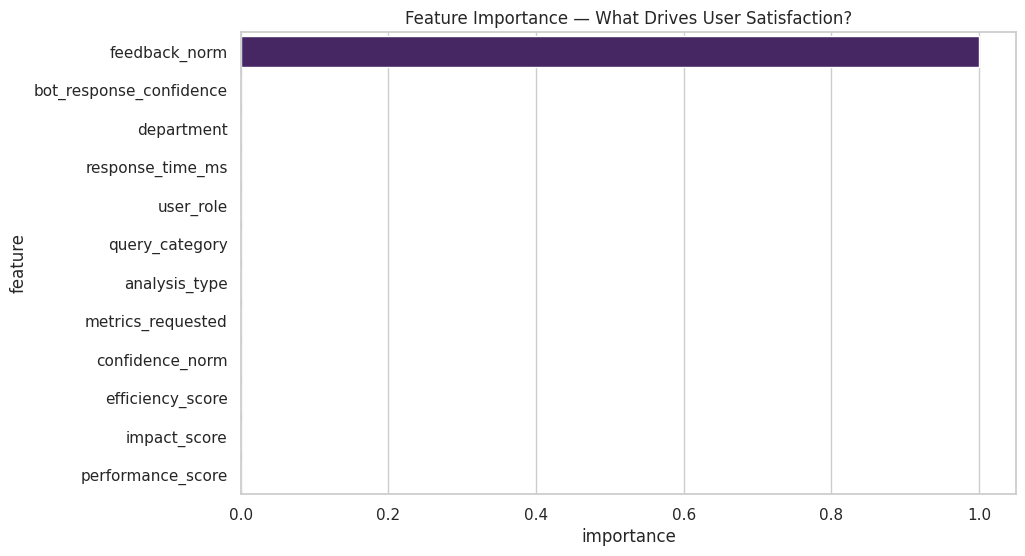

Model + dataset saved for Day 4!


In [29]:

# Predictive Modeling: User Satisfaction Rating

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
# 1. Load Day 2 dataset

df = pd.read_csv("cleaned_chatbot_data.csv")
print("Dataset Loaded for Day 3!")
df.head()

# 2. FIX: Remove rows where target is NaN

df = df.dropna(subset=['user_feedback_rating'])
print("Rows after removing missing feedback:", df.shape[0])

# Re-create derived features that were lost after saving/loading the CSV
df['response_time_sec'] = df['response_time_ms'] / 1000
df['efficiency_score'] = 1 / (1 + df['response_time_sec'])
df['confidence_norm'] = df['bot_response_confidence'] / df['bot_response_confidence'].max()
df['feedback_norm'] = df['user_feedback_rating'] / df['user_feedback_rating'].max()

impact_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}
df['impact_score'] = df['estimated_business_impact'].map(impact_map)

df['performance_score'] = (
    0.4 * df['confidence_norm'] +
    0.3 * df['feedback_norm'] +
    0.2 * df['efficiency_score'] +
    0.1 * (df['impact_score'] / 3)
)

# 3. Encode Categorical Columns

cat_cols = ['department', 'user_role', 'query_category', 'metrics_requested', 'analysis_type']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 4. Define Features & Target

target = 'user_feedback_rating'

features = [
    'bot_response_confidence',
    'response_time_ms',
    'department',
    'user_role',
    'query_category',
    'metrics_requested',
    'analysis_type',
    'confidence_norm',
    'feedback_norm',
    'efficiency_score',
    'impact_score',
    'performance_score'
]

X = df[features]
y = df[target]

# 5. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
# 6. Train Random Forest Model

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)
# 7. Predictions + Evaluation

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

# 8. Feature Importance Plot

importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='importance', y='feature', palette='viridis')
plt.title("Feature Importance — What Drives User Satisfaction?")
plt.show()
# 9. Save Model + Processed Data
joblib.dump(model, "user_satisfaction_model.pkl")
df.to_csv("chatbot_day3_modeldata.csv", index=False)

print("Model + dataset saved for Day 4!")

In [35]:
# ---------------------------------------------------------
# DAY 3.5 — AutoML Style Model Leaderboard (FIXED)
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import joblib

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# ---------------------------------------------------------
# 1. Load dataset
# ---------------------------------------------------------

df = pd.read_csv("cleaned_chatbot_data.csv")
df = df.dropna(subset=['user_feedback_rating'])

# Re-create derived features
df['response_time_sec'] = df['response_time_ms'] / 1000
df['efficiency_score'] = 1 / (1 + df['response_time_sec'])
df['confidence_norm'] = df['bot_response_confidence'] / df['bot_response_confidence'].max()

impact_map = {"Low": 1, "Medium": 2, "High": 3}
df['impact_score'] = df['estimated_business_impact'].map(impact_map)

# Encode categorical columns
cat_cols = ['department', 'user_role', 'query_category', 'metrics_requested', 'analysis_type']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ---------------------------------------------------------
# 2. Define features (NO leakage)
# ---------------------------------------------------------

features = [
    'bot_response_confidence',
    'response_time_ms',
    'department',
    'user_role',
    'query_category',
    'metrics_requested',
    'analysis_type',
    'confidence_norm',
    'efficiency_score',
    'impact_score'
]

# FIX: Remove rows with missing feature values
df = df.dropna(subset=features)

X = df[features]
y = df['user_feedback_rating']

# ---------------------------------------------------------
# 3. Train/Test Split
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---------------------------------------------------------
# 4. Define models
# ---------------------------------------------------------

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=7)
}

# ---------------------------------------------------------
# 5. Leaderboard evaluation
# ---------------------------------------------------------

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

# ---------------------------------------------------------
# 6. Leaderboard
# ---------------------------------------------------------

leaderboard = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
leaderboard = leaderboard.sort_values(by="MAE", ascending=True)
leaderboard.reset_index(drop=True, inplace=True)

print("\n==================== MODEL LEADERBOARD ====================")
print(leaderboard)

# ---------------------------------------------------------
# 7. Save best model
# ---------------------------------------------------------

best_model_name = leaderboard.iloc[0]['Model']
best_model = models[best_model_name]

joblib.dump(best_model, "best_user_satisfaction_model.pkl")

print(f"\nBest model saved: {best_model_name}")


Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 10
[LightGBM] [Info] Start training from score 3.181250
Training SVR...
Training KNN Regressor...

==================== MODEL LEADERBOARD ====================
               Model       MAE      RMSE        R2
0                SVR  0.961567  1.199996 -0.034366
1  Linear Regression  0.972859  1.197803 -0.030588
2  Gradient Boosting  0.991539  1.217594 -0.064927
3      Random Forest  0.994246  1.222057 -0.072747
4      KNN Regressor  1.042857  1.278551 -0.174224
5            XGBoost  1.069419  1.303163 -0.219865
6        


Risk Level Distribution:
risk_level
Low Risk       2105
Medium Risk     756
Name: count, dtype: int64


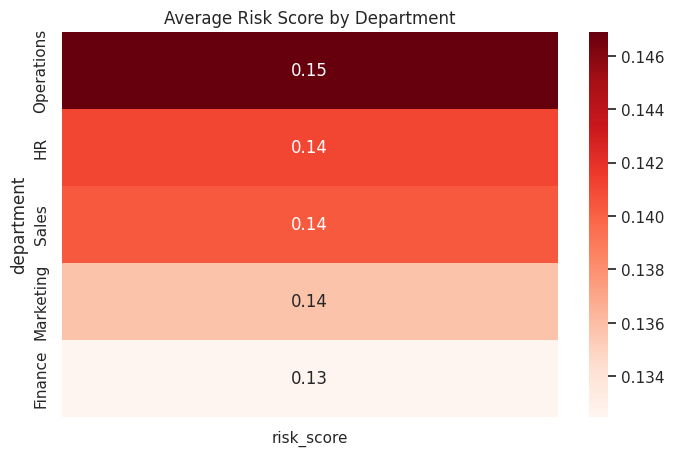

In [36]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

# ---------------------------------------------------------
# 1. Load dataset (from Day 3.5 or Day 2)
# ---------------------------------------------------------

df = pd.read_csv("cleaned_chatbot_data.csv")
df = df.dropna(subset=['user_feedback_rating'])

# Recreate engineered features
df['response_time_sec'] = df['response_time_ms'] / 1000
df['efficiency_score'] = 1 / (1 + df['response_time_sec'])
df['confidence_norm'] = df['bot_response_confidence'] / df['bot_response_confidence'].max()

impact_map = {"Low": 1, "Medium": 2, "High": 3}
df['impact_score'] = df['estimated_business_impact'].map(impact_map)

# ---------------------------------------------------------
# 2. Define Risk Rules
# ---------------------------------------------------------

df['low_confidence_flag'] = (df['bot_response_confidence'] < 0.6).astype(int)
df['high_impact_flag'] = (df['impact_score'] == 3).astype(int)
df['slow_response_flag'] = (df['response_time_ms'] > 2000).astype(int)
df['low_feedback_flag'] = (df['user_feedback_rating'] <= 2).astype(int)

# ---------------------------------------------------------
# 3. Combined Risk Score
# ---------------------------------------------------------

df['risk_score'] = (
    0.4 * df['low_confidence_flag'] +
    0.3 * df['high_impact_flag'] +
    0.2 * df['slow_response_flag'] +
    0.1 * df['low_feedback_flag']
)

# ---------------------------------------------------------
# 4. Risk Level Categorization
# ---------------------------------------------------------

def risk_label(score):
    if score >= 0.7:
        return "High Risk"
    elif score >= 0.3:
        return "Medium Risk"
    else:
        return "Low Risk"

df['risk_level'] = df['risk_score'].apply(risk_label)

# ---------------------------------------------------------
# 5. Risk Summary
# ---------------------------------------------------------

print("\nRisk Level Distribution:")
print(df['risk_level'].value_counts())

# ---------------------------------------------------------
# 6. Department-wise Risk Heatmap
# ---------------------------------------------------------

dept_risk = df.pivot_table(
    values='risk_score',
    index='department',
    aggfunc='mean'
).sort_values(by='risk_score', ascending=False)

plt.figure(figsize=(8,5))
sns.heatmap(dept_risk, annot=True, cmap='Reds')
plt.title("Average Risk Score by Department")
plt.show()

# ------------------------------------------------